# Final Project - S&P500 Index Price Prediction

**Submitted by -**: Mahlet Melese

# Outline
- Abstract
- Introduction
- EDA
- Machine Learning Models
- Back test and Improving Model Performance
- Summary
- Reference

## Abstract

This project aims to forecast whether the price will rise or fall tomorrow. Some individuals attempt to predict the exact price, but this approach has a significant flaw. While my model might excel at precisely estimating the price, it can still result in financial losses. This is because my primary concern, when engaging in stock trading, isn't achieving accuracy in the precise price, but rather in accurately determining the direction of movement whether the price will increase or decrease. Therefore, my aim is to ascertain whether, on days when the stock price rises, we can accurately anticipate this upward trend. This knowledge enables informed stock purchases, centered around predicting whether the stock will ascend or descend.

For this project S&P500 stock dataset was downloaded using Yahoo Finance. Once I have the dataset I can tidied invalid data, dropped the duplicated data, use the insights from EDA and create feature selection on the dataset. In addressing this classification challenge, I created six distinct prediction models. Additionally, an ensemble model, amalgamating KNN, Decision Tree, SVM and regression approaches.Then I tried to Evaluate the model across multiple metrics, including accuracy, precision and others, reveals that the VotingClassifier has comparable performance with other models. Moreover, I conducted back testing as a crucial step to assess the algorithms' performance over several years of historical data. In addition, I introduced supplementary features into the dataset. And to explore the algorithms , I adjusted the prediction horizons and analyzed rolling means. Then the model enhanced with these new features, showed  57% precision in predicting upward movements in stock prices during purchase instances.


## Introduction

#### The project's domain background:
Exploring the dynamics of the finance sector showed the remarkable potential of machine learning. The S&P500 index includes the stock performance of 500 major US-listed corporations, constitutes my focal point. I intend to construct a machine learning model that forecasts the forthcoming S&P500 price index using historical data and subject the model to backtesting across over two decades of historical data. This extensive timeframe, spanning from 1990 to the present, ensures the project's analysis retains meaningful depth and solidifying my confidence in the predictions it produces.

In light of my present limitations in comprehensively assessing a company's intrinsic worth and conducting stock valuations, I've discerned the stock price prediction as an exceptionally fitting focus of study.The typical structure of historical data for the S&P stock index from "Yahoo! Finance" encompasses Date, Open, High, Low, Close, Volume, Dividends, and Stock Splits.
The S&P500, an index gauging the stock performance of 500 major US-listed corporations, constitutes our focal point. I intend to construct a machine learning model that forecasts the forthcoming S&P500 price index using historical data, and subject this model to back testing across over two decades of historical data. This extensive timeframe, spanning from 1990 to the present, ensures the project's analysis retains meaningful depth and validity, solidifying our confidence in the predictions it produces.


#### Data Sources:
To initiate the process, I begin by importing the 'yfinance' package, by calling the 'yfinance’API. And then  I proceed to use the ticker class, a pivotal component facilitating the retrieval of historical price data for a specific symbol. For the scope of this project, the symbol of choice is 'GSPC,’ which is similar with the S&P500 index. Once I downloaded the dataset: Each entry within this data frame corresponds to the price on a single trading day, effectively excluding non-trading days. Notably, the data frame encompasses supplementary columns named 'Dividends' and 'Stock Splits.’ and these columns are not integrated into my analysis. B/c their presence is more important within the context of individual stocks, rather than in the domain of index price forecasting.

Central to my endeavor is the utilization of these columns in prognosticating the future directional movement of stock prices – whether they ascend or descend. Notably, the data frame encompasses supplementary columns named 'Dividends' and 'Stock Splits.' It is important to elucidate that these columns are not integrated into our analysis. Their pertinence is more pronounced within the context of individual stocks, rather than in the domain of index price forecasting.

## Exploratory Data Analysis (EDA) 

### Import Libraries

In [2]:
#Import Dependencies
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn import neighbors, preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report, precision_score,recall_score
import xgboost as xgb

# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile

from pptx import Presentation 
from pptx.util import Inches
from pptx.util import Pt
import pptx
from pptx.enum.text import PP_ALIGN
from io import StringIO

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#### Downloading S&P500 index price dataset

In [58]:
# Fetch historical data for S&P500 from Yahoo Finance
sp500=yf.Ticker("^GSPC")
sp500= sp500.history(period="max")

fig.savefig('u7.png') # saving image so we can use in ppt

# Display the Dataset 
sp500.head(10)





,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0


This is the first 10 rows of the dataset using the head method.Here, we can have a first look at the features and some of the values that each one takes.

#### Description for 7 Attributes 
| Columns| Description |
|:------:|-|
| INDEX |  Unique ID | 
| Date | The date of the record | 
| Open | The opening price of the day (when trading starts| 
|High| The highest trade price during the day|
|Low| The lowest trade price during the day|
|Close|The closing price for the day (when trading is finished)|
|Volume| The number of shares traded|

 **Check the dataset shape**

Knowing the amount of data we have is very important, because the quality of our analysis is depend on that.

In [59]:
# check the result
sp500.shape

(24017, 7)

#### Check the datetime index

The index column enable us to index and slice the dataframe easly.

In [4]:
# check the s&p500 index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
               '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
               '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00',
               '2023-08-07 00:00:00-04:00', '2023-08-08 00:00:00-04:00',
               '2023-08-09 00:00:00-04:00', '2023-08-10 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24017, freq=None)

 **Check data type of all columns**

Pandas.info method helps us to display the data types of all columns as a series.

In [5]:
# Check the data types
sp500.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24017 entries, 1927-12-30 00:00:00-05:00 to 2023-08-10 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24017 non-null  float64
 1   High          24017 non-null  float64
 2   Low           24017 non-null  float64
 3   Close         24017 non-null  float64
 4   Volume        24017 non-null  int64  
 5   Dividends     24017 non-null  float64
 6   Stock Splits  24017 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


####  Let's check if there is a missing value
I checked null values which is a fundamental part of data cleaning.

In [178]:
# recommended code 
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sanity check, that there are indeed no null values in the dataset

#### Check duplicate value in the dataframe

In [6]:
# use duplicated function
sp500_dup = sp500.duplicated()

# check the result
sp500_dup.value_counts()

False    20161
True      3856
Name: count, dtype: int64

#### Plot the closing price aginst the index


<Axes: xlabel='Date'>

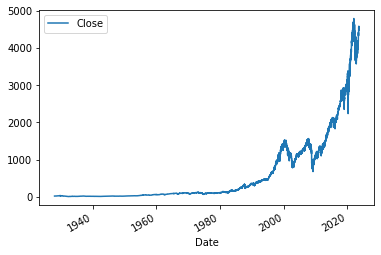

In [8]:
# plot closing price vs index

sp500.plot.line(y="Close",use_index=True)

fig.savefig('w5.png')


The depicted graph illustrates the historical price movement of the S&P 500 index. Observing this graph, we really can regret not buying the index fund anypoint in the last few years.

### Dataset preparation

This data frame contains a significant amount of historical data, which is generally beneficial. However, when dealing with stock market data, an excessive historical range could lead to fundamental shifts in the market by rendering some outdated data irrelevant for future predictions. Therefore, I intend to eliminate all entries before 1990-01-01. Additionally, I will exclude the Dividends and Stock Splits columns from the data frame.

In [9]:
# remove extra columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
# remove data before 1990-01-01
# use panda's loc method
# only take rows where the index is at least 1990-01-01
df = sp500.loc["1990-01-01":].copy()

In [11]:
# create column called tomorrow
# the new column going to be tomorrow's price
# use panda's shift method
# use the close column and shift all the price back one day

df["Tomorrow"] = df["Close"].shift(-1)

# show the dataframe
df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961


#### Setting up the target for machine learning

In [12]:
# set up the target, this is what I am trying to predict using machine learning
# based on tomorrow's price set up the target price
# the target: is tomorrow's price grater than tody's price

df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

fig.savefig('x6.png')

# show the dataframe
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941,1
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0


#### Check duplicates after data preparation

In [13]:
# use duplicated function
sp500_dup = df.duplicated()

# check the result
sp500_dup.value_counts()

False    8467
Name: count, dtype: int64

In [15]:
# Brief Description of our dataset
fig.savefig('y2.png')

df.describe()



,Open,High,Low,Close,Volume,Tomorrow,Target
count,8467.000000,8467.000000,8467.000000,8467.000000,8.467000e+03,8466.000000,8467.000000
mean,1550.424882,1559.663873,1540.555379,1550.746800,2.442800e+09,1550.887488,0.534310
std,1050.759655,1056.542330,1044.597035,1050.917036,1.852428e+09,1050.899367,0.498851
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,889.915009,899.015015,878.970001,890.194977,6.259850e+08,890.259979,0.000000
50%,1262.060059,1270.000000,1254.239990,1262.069946,2.424700e+09,1262.079956,1.000000
75%,2013.054993,2021.799988,1997.304993,2012.234985,3.823775e+09,2012.302490,1.000000
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,4796.560059,1.000000


#### Distribution of the dataset using histogram

In [ ]:
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
selected_data = df[selected_columns]

# Plot histograms using hist method
histogram = selected_data.hist(layout=(2, 3), figsize=(10, 6))

# Set titles and labels for each subplot
for i, column in enumerate(selected_columns):
    row = i // 3
    col = i % 3
    histogram[row, col].set_title(column)
    histogram[row, col].set_xlabel(column)

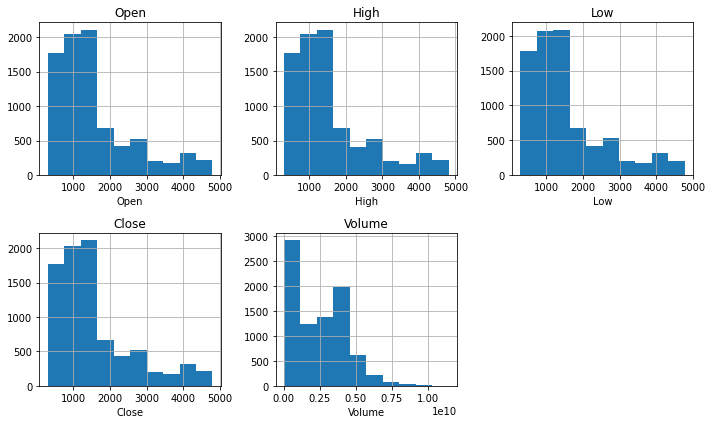

In [13]:
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('histogram.png')# saving image so we can use in ppt
plt.show()

Based on the distribution plot,we need to scale the dataset, before modeling.

#### Boxplot:

In [ ]:
num_column = ['Open', 'High', 'Low', 'Close', 'Volume']

# set figure size
fig = plt.figure(figsize=(10, 10))
i = 1
for f in num_column :
    plt.subplot(3, 3, i)
    plt.boxplot(df[f], whis=1.5) # Increase the size of the box using 'whis' parameter
    plt.title(f)
    i += 1

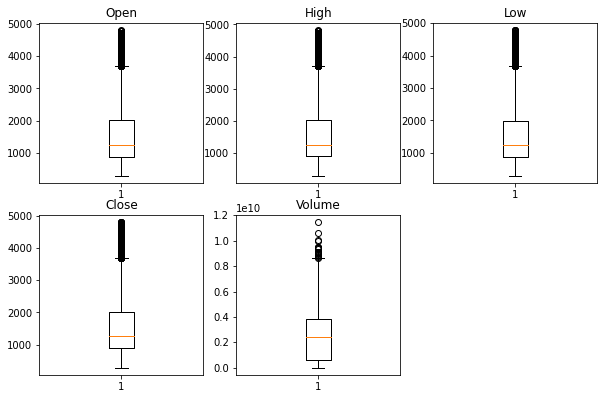

In [14]:
fig.savefig('i1.png') # saving image so we can use in ppt
plt.show()

Volume column has outliers that we will need to scale later before model training.

####  Let's look at each column individually

##### Open:

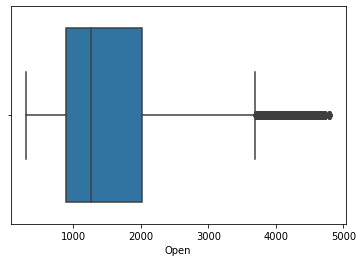

In [15]:
sns.boxplot(df.Open)
fig.savefig('m1.png') # saving image so we can use in ppt

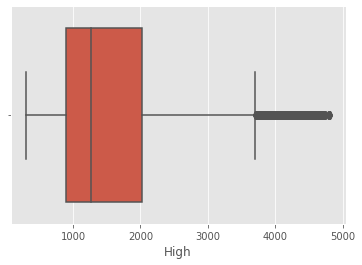

In [368]:
sns.boxplot(df.High)
fig.savefig('b1.png') # saving image so we can use in ppt

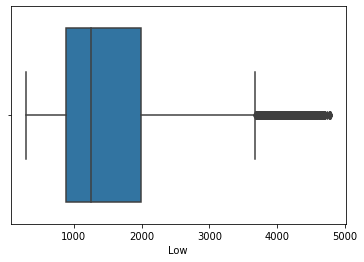

In [16]:
sns.boxplot(df.Low)
fig.savefig('s1.png') # saving image so we can use in ppt

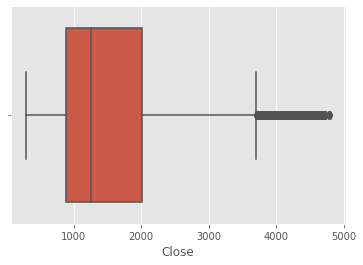

In [370]:
sns.boxplot(df.Close)
fig.savefig('k1.png') # saving image so we can use in ppt

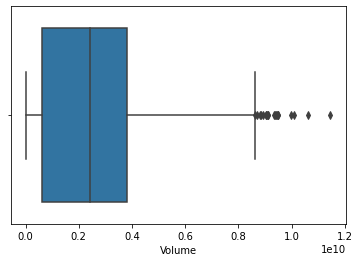

In [17]:
sns.boxplot(df.Volume)
fig.savefig('v1.png') # saving image so we can use in ppt

Volume column shows that there are outliers, and we need to address this later in the data preparation before modeling. 

In [ ]:
# Plotting close price data
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.grid(True)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close', fontsize=14)
df['Close'].plot(color='blue')
plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('S&P500 Closing Price', fontsize=18)
fig.savefig('i9.png'

<ipython-input-23-8276ab602138>:8: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency


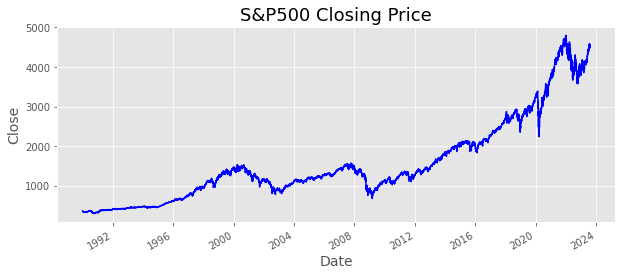

In [23]:
plt.show()

In [ ]:
# Plot close price count
plt.figure(figsize=(10, 4)) 
sns.histplot(df['Close'], kde=True, color='blue')
plt.xlabel('Close', fontsize=20)
plt.xticks(fontsize = 15)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize  = 15)
plt.title('Histogram of Close Prices', fontsize=15)
fig.savefig('e8.png')

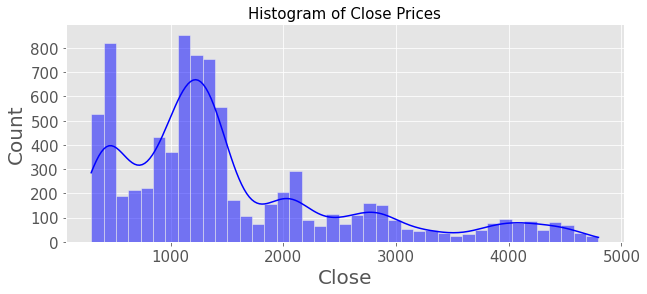

In [373]:
plt.show()

This histogram plot shows the distribution of the 'Close' prices, where the x-axis represents the 'Close' price range and the y-axis represents the frequency (count) of occurrences within each price range.And this plot provides a smooth estimate of the probability density function for the 'Close' prices.And can help us understand the central tendency, spread, and potential outliers in the 'Close' prices distribution.

## Machine Learning Models 
#### Training an initial machine learning model

With the dataset now prepared, I am poised to initiate training for the machine learning model. To embark on this journey, I've opted to employ the RandomForestClassifier as my primary choice. This preference is rooted in several compelling reasons. First and foremost, the RandomForestClassifier operates through the training of multiple distinct decision trees, each characterized by randomized parameters. The subsequent amalgamation of outcomes from these trees engenders a mitigation of overfitting tendencies. Although overfitting remains a potential concern, its manifestation is notably subdued in comparison to alternative model architectures.

Additionally, the RandomForestClassifier boasts a commendable pace of execution, rendering it an efficient candidate for my purposes. Furthermore, its adeptness in capturing non-linear trends within the data renders it particularly suited for my venture. Take, for instance, the relationship between the opening price and the target variable, this connection isn't confined to linear correlation. The RandomForestClassifier's capacity to discern and account for such intricate non-linear dependencies aligns seamlessly with the multifaceted nature of stock price prediction, where non-linearity often pervades the underlying relationships.

In [46]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941,1
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0


In [17]:
# count value for the target column
df.Target.value_counts()

Target
1    4524
0    3943
Name: count, dtype: int64

There are 3943 data points belonging to 0 and 4524 data points belonging to 1.

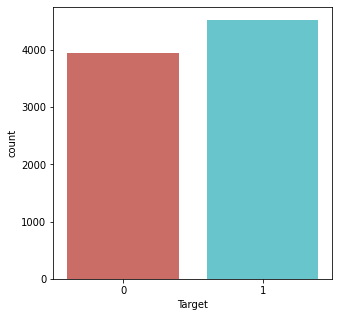

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='Target', data=df, palette='hls')
plt.show()
fig.savefig('z10.png')

#### Calculate the null error rate


The null error rate, often referred to as the baseline error rate, serves as a benchmark or reference point for assessing the performance of a classification models. In the case of a regression problem (predicting a continuous value), the null error rate could be the mean or median of the target variable. For a classification problem (predicting a class), the null error rate is typically the proportion of the majority class in the dataset.

In [20]:
#Null error rate
NRE = df.Target.value_counts()[1]/(df.Target.value_counts()[0] + df.Target.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

0.46569032715247427

In this case, with a null error rate of 46.6%, it implies that if I make predictions by simply assigning every instance to the majority class (likely the most frequent class in my dataset), I would expect to be incorrect approximately 46.6% of the time.

- Let's  split the data into training and testing, and I am going to scale the data so they are all in the same range using the MinMaxScaler.

In [22]:
#Prepare data for classification process
# # Split the data into train and test sets
# use all of the row's except the last 100 rows
# and use the last 100 row's in the test set

train=df.iloc[:-100]
test = df.iloc[-100:]

# Define the predictor columns and target column
predictors = ["Close","Volume","Open","High","Low"]
target = "Target" 

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the training data
train_scaled = scaler.fit_transform(train[predictors])

# Transform the test data using the scaler fitted on training data
test_scaled = scaler.transform(test[predictors])

In [23]:
# Collect all kinds of scores
Accuracy = []
Precision = []
Recall = []
F1_score = []
models = ['DecisionTree','KNN','SVM','RandomForest','LogisticRegression',
'XGBtClassifier','VotingClassifier']

### 1. RandomForest Classifier

Within this model, an increased count of trees serves to diminish the model's variability. The parameter 'n_estimators' delineates the quantity of trees within the forest, and the default value of 100 proves adept in its performance within this context. My pursuit involves experimentation with varying 'n_estimators,' guided by recommendations found in literatures. Elevating the count of trees enhances the model's data comprehension capabilities. However, it's crucial to manage the trade-off with 'max_depth.' To mitigate the potential overfitting risk associated with a higher 'max_depth,' I adhere to a value of 10. This choice aligns notably well, particularly in scenarios where feature dimensions are constrained.

In [24]:
# now initalize the model
# use n_estimators: the number of decision trees we want to train, the higher the number the better the accuracy
# min_samples_split :help us protect against over-fitting
# set random_state:if we run the same model twice, the random numbers generated will be in a predictble sequence
#model_1 = RandomForestClassifier(n_estimators=50,  random_state=42)
#model_1 = RandomForestClassifier(n_estimators=200,class_weight='balanced',  random_state=42)
#model_1 = RandomForestClassifier(n_estimators=64,class_weight='balanced',  random_state=42)
#model_1 = RandomForestClassifier(n_estimators=100,class_weight='balanced', max_depth=16,  random_state=42)

model_1= RandomForestClassifier(n_estimators = 100,min_samples_split=15,
class_weight='balanced',max_depth=10,random_state =42)

# let's train the model using the predictor column inorder to predict the target
# use mode.fit method
# let's train the model using the predictor column inorder to predict the target
# use mode.fit method
model.fit(train[predictors],train["Target"])


0.7165214823564152

In [ ]:
#Print metrics
# generate prediction using the model with predict method
y_train_pred=model_1.predict(train[predictors])
print(classification_report(train["Target"], y_train_pred))
print(confusion_matrix(train["Target"], y_train_pred))

p = precision_score(train["Target"], y_train_pred)
f = f1_score(train["Target"], y_train_pred)
a = accuracy_score(train["Target"], y_train_pred)
rc=recall_score(train["Target"], y_train_pred)

In [26]:
# print the result
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.73      0.61      0.67      3131
           1       0.71      0.81      0.75      3642

    accuracy                           0.72      6773
   macro avg       0.72      0.71      0.71      6773
weighted avg       0.72      0.72      0.71      6773

[[1919 1212]
 [ 708 2934]]
Precision: 0.7076700434153401
Recall: 0.8056013179571664
F1 score: 0.7534668721109399
Accuracy: 0.7165214823564152


#### Let's measure how accurate the model is on the test data

- This holds significant importance within the realm of machine learning. It's crucial for us to evaluate whether our model aligns with our intended outcomes. Specifically, the precision score comes into play. It gauges the accuracy of our predictions when we anticipated the market to rise (designated as 1). Essentially, it quantifies how often our predictions of market growth were accurate. 

This metric proves particularly effective in this context, given our presumption that we aim to purchase stocks and retain them until their value appreciates before selling. Therefore, it's imperative that the stock price ascends upon purchase. Depending on our objectives, we can modify the choice of error metrics to assess performance. For this project, I will be employing precision, accuracy, and the F1 score for evaluation.

#### Model Prediction and  Evalution

In [ ]:
# generate prediction using the model with predict method
y_preds = model_1.predict(test[predictors])

print(classification_report(test["Target"],y_preds))
print(confusion_matrix(test["Target"],y_preds))

p = precision_score(test["Target"],y_preds)
f = f1_score(test["Target"],y_preds)
a = accuracy_score(test["Target"],y_preds)
rc=recall_score(test["Target"],y_preds)
# Calculate the null error rate (proportion of the majority class)
null_error_rate = 1 - y_test.mean()

In [35]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
print(f"Null Error Rate: {null_error_rate:.2f}")

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       812
           1       0.52      0.61      0.56       882

    accuracy                           0.51      1694
   macro avg       0.50      0.50      0.50      1694
weighted avg       0.50      0.51      0.50      1694

[[318 494]
 [344 538]]
Precision: 0.5213178294573644
Recall: 0.6099773242630385
F1 score: 0.562173458725183
Accuracy: 0.5053128689492326
Null Error Rate: 0.48


When we indicated that the stock price increased, it occurred merely 52% of the instances.

 ### 2.  DecisionTree Classifier
- max_depth: the maximum depth of the tree
- min_samples_split: the minimum number of samples required to split an internal node

In [28]:
# train the model
model_2 =DecisionTreeClassifier(max_depth=12, min_samples_split=10)
model_2.fit(train[predictors],train["Target"])

DecisionTreeClassifier(max_depth=12, min_samples_split=10)

In [ ]:
model_2.score(train[predictors],train["Target"])

#Print metrics
y_train_pred_1 = model_2.predict(train[predictors])

print(classification_report(train["Target"], y_train_pred_1))
print(confusion_matrix(train["Target"], y_train_pred_1))

p = precision_score(train["Target"], y_train_pred_1)
f = f1_score(train["Target"], y_train_pred_1)
a = accuracy_score(train["Target"], y_train_pred_1)
rc=recall_score(train["Target"], y_train_pred_1)

In [36]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.71      0.31      0.43      3131
           1       0.60      0.89      0.72      3642

    accuracy                           0.62      6773
   macro avg       0.66      0.60      0.58      6773
weighted avg       0.65      0.62      0.59      6773

[[ 970 2161]
 [ 389 3253]]
Precision: 0.6008496490579978
Recall: 0.8931905546403075
F1 score: 0.7184187279151943
Accuracy: 0.6235050937546139


Here, using max depth of 12 for model 2, a test accuracy of 62% is achieved. Class 1 got F1 score which is 72% while Class 0 got an F1 score of 43%.

#### Model Prediction and Evalution

In [ ]:
# generate prediction using the model with predict method
y_preds_1 = model_2.predict(test[predictors])

print(classification_report(test["Target"],y_preds_1))
print(confusion_matrix(test["Target"],y_preds_1))

p = precision_score(test["Target"],y_preds_1)
f = f1_score(test["Target"],y_preds_1)
a = accuracy_score(test["Target"],y_preds_1)
rc=recall_score(test["Target"],y_preds_1)

In [33]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.46      0.20      0.28       812
           1       0.52      0.79      0.63       882

    accuracy                           0.51      1694
   macro avg       0.49      0.49      0.45      1694
weighted avg       0.49      0.51      0.46      1694

[[159 653]
 [184 698]]
Precision: 0.5166543301258327
Recall: 0.7913832199546486
F1 score: 0.6251679355127632
Accuracy: 0.5059031877213696


When we said the stock price go up, it only went up by 51.6% of the time.

### 3. SVM

 Recognizing the SVM's reliance on hyperplane selection for classification, I discerned the potential for enhancing the algorithm's adaptability to elevate its classification prowess. As anticipated, the linear kernel manifested the least favorable performance. Subsequently, I iteratively explored kernels like sigmoid before delving into the polynomial kernel. An interesting observation emerged wherein logistic functions, being a subset of sigmoid functions, yielded comparable outcomes akin to those of logistic regression and the sigmoid kernel. This guided my trajectory toward adopting the polynomial function as the kernel of choice.

The integration of the probability parameter materialized from my endeavors to troubleshoot ensemble models. This adjustment became pivotal for voting classifiers, which demand class probability estimation from all participating classifiers,an attribute not innately present in the default SVC settings. Manipulating these settings proved essential to ensuring the seamless operation of the ensemble model.

In [52]:
#Create a svm Classifier
#svm = SVC(kernel='sigmoid', probability = True)
#svm = SVC(kernel='rbf', probability = True)
svm = SVC(kernel='poly', probability = True)
svm.fit(train[predictors],train["Target"])

SVC(kernel='poly', probability=True)

In [ ]:
# train the model
svm.score(train[predictors],train["Target"])

#Print metrics
svm_preds = svm.predict(train[predictors])

print(classification_report(train["Target"],svm_preds))
print(confusion_matrix(train["Target"], svm_preds))

p = precision_score(train["Target"], svm_preds)
f = f1_score(train["Target"], svm_preds)
a = accuracy_score(train["Target"], svm_preds)
rc=recall_score(train["Target"], svm_preds)

In [35]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.64      0.01      0.01      3158
           1       0.53      1.00      0.70      3614

    accuracy                           0.53      6772
   macro avg       0.59      0.50      0.35      6772
weighted avg       0.58      0.53      0.38      6772

[[  16 3142]
 [   9 3605]]
Precision: 0.5343115458722395
Recall: 0.9975096845600443
F1 score: 0.6958787761799053
Accuracy: 0.5347017129356173


Support Vector Machines (SVM) are recognized for their relatively robust nature in handling outliers when compared to certain other machine learning algorithms. In this context, I have achieved an improved outcome that aligns favorably with my initial expectations.

#### Model Prediction and Evalution

In [ ]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
y_preds_svm= svm.predict(test[predictors])

print(classification_report(test["Target"],y_preds_svm))
print(confusion_matrix(test["Target"], svm_preds))

p = precision_score(test["Target"],y_preds_svm)
f = f1_score(test["Target"],y_preds_svm)
a = accuracy_score(test["Target"],y_preds_svm)
rc=recall_score(test["Target"],y_preds_svm)

In [36]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       784
           1       0.54      1.00      0.70       909

    accuracy                           0.54      1693
   macro avg       0.60      0.50      0.35      1693
weighted avg       0.60      0.54      0.38      1693

[[  4 780]
 [  2 907]]
Precision: 0.5376407824540604
Recall: 0.9977997799779978
F1 score: 0.6987673343605548
Accuracy: 0.538098050797401


When we predicted an increase in the stock price, it occurred only 54% of the time.

### 4.KNN

- Given KNN's reliance on parameter K, it's essential to recognize that selecting a smaller K value amplifies the influence of noise on results, while a larger K value escalates computational demands. My approach commences with K=3 and systematically traverses various K values, often gravitating towards the square root of the sample size (n) for the models. The algorithm's inherent computational efficiency empowers me to directly employ grid search to pinpoint optimal parameter values.

In [37]:
#defining grids
#train sample size
n_neighbor = [3,5,10,13,19,29, 45, 78, 99]

# create and fit  model, testing each parameters
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=dict(n_neighbors=n_neighbor))
knn_grid.fit(train[predictors],train["Target"])
print(knn_grid)
# summarize the results of the grid search
print('Best Score: ',knn_grid.best_score_)
print('Best parameters: ',knn_grid.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 13, 19, 29, 45, 78, 99]})
Best Score:  0.5202271798198042
Best parameters:  {'n_neighbors': 5}


- Based on testing, the accuracy of the model decreases since a large K value may reduce overfit. On the other hand, it raised the risk of overfitting. Although the best k selected by grid search is when k=5, I still determine to use k=10. Because this gave a relatively balanced result. What's more, it reduced the risk of making the model too sensitive.

In [37]:
#set k=3
# try knn = KNeighborsClassifier(n_neighbors=5)
# try knn = KNeighborsClassifier(n_neighbors=99)
#set the best K from Gid search

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train[predictors],train["Target"])

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# train the model
knn.score(train[predictors],train["Target"])

#Print metrics
y_knn_preds = knn.predict(train[predictors])

print(classification_report(train["Target"], y_knn_preds))
print(confusion_matrix(train["Target"], y_knn_preds))

p = precision_score(train["Target"], y_knn_preds)
f = f1_score(train["Target"], y_knn_preds)
a = metrics.accuracy_score(train["Target"], y_knn_preds)
rc=recall_score(train["Target"], y_knn_preds)

In [39]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      3131
           1       0.69      0.60      0.64      3642

    accuracy                           0.64      6773
   macro avg       0.64      0.64      0.64      6773
weighted avg       0.65      0.64      0.64      6773

[[2148  983]
 [1444 2198]]
Precision: 0.6909776799748507
Recall: 0.6035145524437122
F1 score: 0.6442913674336801
Accuracy: 0.641665436291156


#### Model Prediction and Evalution 

In [ ]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_knn= knn.predict(test[predictors])

print(classification_report(test["Target"],preds_knn))
print(confusion_matrix(test["Target"],preds_knn))

p = precision_score(test["Target"],preds_knn)
f = f1_score(test["Target"],preds_knn)
a = accuracy_score(test["Target"],preds_knn)
rc=recall_score(test["Target"],preds_knn)

In [41]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.47      0.52      0.50       812
           1       0.51      0.45      0.48       882

    accuracy                           0.49      1694
   macro avg       0.49      0.49      0.49      1694
weighted avg       0.49      0.49      0.49      1694

[[426 386]
 [481 401]]
Precision: 0.5095298602287166
Recall: 0.4546485260770975
F1 score: 0.48052726183343314
Accuracy: 0.4881936245572609


Support Vector Machines (SVMs) exhibit stronger resilience to outliers compared to k-Nearest Neighbors (KNN).In this specific case, I observed improved outcome with SVM than KNN.

### 5. Logistic Regression
In the context of S&P 500 prediction, Logistic Regression can be utilized to make binary predictions about whether the S&P 500 index will either rise or fall on a given day.

In [42]:
#Start with default setting for logistic regression
model_log = LogisticRegression(solver='saga', max_iter=1000)
#train the algorithm
model_log.fit(train[predictors],train["Target"])

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
model_log.score(train[predictors],train["Target"])

#Print metrics
y_log_preds = model_log.predict(train[predictors])

print(classification_report(train["Target"],y_log_preds))
print(confusion_matrix(train["Target"], y_log_preds))

p = precision_score(train["Target"], y_log_preds)
f = f1_score(train["Target"], y_log_preds)
a = metrics.accuracy_score(train["Target"], y_log_preds)
rc=recall_score(train["Target"], y_log_preds)

In [44]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3131
           1       0.54      1.00      0.70      3642

    accuracy                           0.54      6773
   macro avg       0.77      0.50      0.35      6773
weighted avg       0.75      0.54      0.38      6773

[[   1 3130]
 [   0 3642]]
Precision: 0.5378027170702895
Recall: 1.0
F1 score: 0.6994430574227003
Accuracy: 0.5378709582164477


#### Model Prediction and Evalution

In [ ]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_log= model_log.predict(test[[predictors]])

print(classification_report(test["Target"],preds_log))
print(confusion_matrix(test["Target"],preds_log))

p = precision_score(test["Target"],preds_log)
f = f1_score(test["Target"],preds_log)
a = accuracy_score(test["Target"],preds_log)
rc=recall_score(test["Target"],preds_log)

In [45]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       812
           1       0.52      1.00      0.68       882

    accuracy                           0.52      1694
   macro avg       0.26      0.50      0.34      1694
weighted avg       0.27      0.52      0.36      1694

[[  0 812]
 [  0 882]]
Precision: 0.5206611570247934
Recall: 1.0
F1 score: 0.6847826086956522
Accuracy: 0.5206611570247934


C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Until now, the SVM model out outcomes and  closely mirroring other models. Now, it's time to evaluate the performance of the remaining models.

### 6. XG BOOST(Extreme Gradient Boosting)

XGBoost harnesses the strengths of both random forest and gradient boosting, resulting in a prediction error that is typically lower than that of boosting or random forest alone. When fine-tuning XGBoost hyperparameters, my primary focus is on adjusting the early_stopping_rounds value. Moreover, the default learning rate of 0.1 has proven effective in this scenario.

In [47]:
# define the model
xgb_clf = xgb.XGBClassifier(weighted='balanced',random_state=42)
#Vary the stopping value for checking difference of parameters.
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test, y_test)])
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=20,eval_set=[(X_test, y_test)])
# I set verbose =1 to avoid too many tree building information
xgb_clf.fit(train[predictors], train["Target"], early_stopping_rounds=15,verbose = 1, eval_set=[(X_test, y_test)])


[10:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "weighted" } are not used.

[0]	validation_0-logloss:0.69363
[1]	validation_0-logloss:0.69381
[2]	validation_0-logloss:0.69484
[3]	validation_0-logloss:0.69378
[4]	validation_0-logloss:0.69446
[5]	validation_0-logloss:0.69484
[6]	validation_0-logloss:0.69545
[7]	validation_0-logloss:0.69575
[8]	validation_0-logloss:0.69660
[9]	validation_0-logloss:0.69876
[10]	validation_0-logloss:0.69872
[11]	validation_0-logloss:0.69919
[12]	validation_0-logloss:0.69992
[13]	validation_0-logloss:0.70024
[14]	validation_0-logloss:0.70236


C:\Users\suraf\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# train the model 
xgb_clf.score(train[predictors], train["Target"])

#Print metrics
y_preds_xgb = xgb_clf.predict(train[predictors])

print(classification_report(train["Target"], y_preds_xgb))
print(confusion_matrix(train["Target"], y_preds_xgb))

p = precision_score(train["Target"], y_preds_xgb)
f = f1_score(v, y_preds_xgb)
a = metrics.accuracy_score(train["Target"], y_preds_xgb)
rc=recall_score(train["Target"], y_preds_xgb)

In [49]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.57      0.27      0.36      3131
           1       0.57      0.83      0.67      3642

    accuracy                           0.57      6773
   macro avg       0.57      0.55      0.52      6773
weighted avg       0.57      0.57      0.53      6773

[[ 833 2298]
 [ 625 3017]]
Precision: 0.5676387582314205
Recall: 0.828390993959363
F1 score: 0.6736630568270626
Accuracy: 0.5684334858998966


#### Model Prediction and Evalution 

In [ ]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_xgb= xgb_clf.predict(test[predictors])

print(classification_report(test["Target"],preds_xgb))
print(confusion_matrix(test["Target"],preds_xgb))

p = precision_score(test["Target"],preds_xgb)
f = f1_score(test["Target"],preds_xgb)
a = accuracy_score(test["Target"],preds_xgb)
rc=recall_score(test["Target"],preds_xgb)

In [47]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.48      0.11      0.18       784
           1       0.54      0.89      0.67       909

    accuracy                           0.53      1693
   macro avg       0.51      0.50      0.43      1693
weighted avg       0.51      0.53      0.45      1693

[[ 88 696]
 [ 96 813]]
Precision: 0.5387673956262425
Recall: 0.8943894389438944
F1 score: 0.6724565756823822
Accuracy: 0.5321913762551683


The results demonstrated that it outperforms other models across nearly all metrics, while also requiring less time for computation.But, it has comparable accuracy with SVM and logistics regression.

#### Feature importance with XGBoost.

- One of the many benefits of using XGBoost is that it can automatically provide estimates of feature importance from a trained
predictive model.

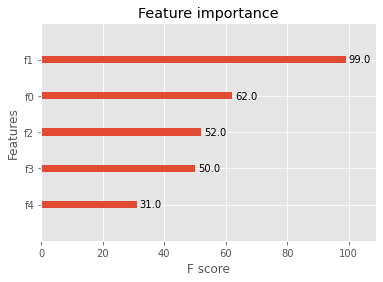

In [389]:
# calculates the importance of each feature in the training data
xgb.plot_importance(xgb_clf)
plt.show()
fig.savefig('w20.png')


### 7. Ensemble Model

The ensemble approach involves assembling four individual models into an array known as 'estimators,' which serves as the foundation for constructing a voting classifier. This voting classifier takes a pair of inputs: the first input being the array of estimators that encompasses the four models. The fundamental principle behind a voting ensemble is to aggregate predictions generated by classification models through summation or by averaging predictions from regression models. Additionally, it provides us with the flexibility to adjust parameters for the SVM model.

In the initial phase, I configured the voting parameter to 'hard,' guiding the classifier to make straightforward predictions. However, through research, I came to realize that utilizing 'soft' voting often yields superior performance compared to hard voting. This is attributed to the heightened significance placed on highly confident votes. The key distinction lies in the approach: 'soft' voting involves summing the predicted probabilities for each label. To simplify, while 'hard' voting predicts the majority label, 'soft' voting predicts the label associated with the highest predicted probability.

Upon implementing 'soft' voting for the model, I observed a modest enhancement in its performance.

With the refined ensemble model in place, I will proceed to train it using the training data and subsequently evaluate its performance on the testing data.

In [53]:
#create a dictionary of our models
estimators=[('KNN', knn),(' DecisionTree', model_2),('Regression Model', model_log), ('SVM', svm), ]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
#fit model to training data
ensemble.fit(train[predictors, train["Target"])

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             (' DecisionTree',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=10)),
                             ('Regression Model',
                              LogisticRegression(max_iter=1000, solver='saga')),
                             ('SVM', SVC(kernel='poly', probability=True))],
                 voting='soft')

In [ ]:
# train the model
ensemble.score(train[predictor], train["Target"])

#Print metrics
ensemble_preds = ensemble.predict(train[predictor])

print(classification_report(train["Target"], ensemble_preds))
print(confusion_matrix(train["Target"], ensemble_preds))

p = precision_score(train["Target"],ensemble_preds)
f = f1_score(train["Target"], ensemble_preds)
a = accuracy_score(train["Target"], ensemble_preds)
rc=recall_score(train["Target"], ensemble_preds)

In [54]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)


              precision    recall  f1-score   support

           0       0.78      0.41      0.54      3131
           1       0.64      0.90      0.75      3642

    accuracy                           0.67      6773
   macro avg       0.71      0.65      0.64      6773
weighted avg       0.70      0.67      0.65      6773

[[1283 1848]
 [ 370 3272]]
Precision: 0.6390625
Recall: 0.8984074684239429
F1 score: 0.746861447158183
Accuracy: 0.6725232540971504


In [55]:
#test our model on the test data
ensemble.score(test[predictors], test["Target"])

0.5059031877213696

#### Model Prediction and Evalution

In [ ]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_ensemble= ensemble.predict(test[predictor])

print(classification_report(test["Target"], preds_ensemble))
print(confusion_matrix(test[Target], preds_ensemble))

p = precision_score(test["Target"], preds_ensemble)
f = f1_score(test["Target"], preds_ensemble)
a = accuracy_score(test["Target"], preds_ensemble)
rc=recall_score(test["Target"], preds_ensemble)

In [56]:
print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.47      0.24      0.31       812
           1       0.52      0.76      0.61       882

    accuracy                           0.51      1694
   macro avg       0.49      0.50      0.46      1694
weighted avg       0.49      0.51      0.47      1694

[[191 621]
 [216 666]]
Precision: 0.5174825174825175
Recall: 0.7551020408163265
F1 score: 0.6141078838174274
Accuracy: 0.5059031877213696


According to this outcome, the ensemble model demonstrates relatively comparable performance when contrasted with the others.

### Building a Back Testing System

My subsequent objective involves establishing a more robust testing methodology for the algorithms, enabling us to accurately gauge the performance over extended time periods. Presently, this testing has been limited to 20 percent of the data. However, as we aspire to create a comprehensive stock price model for real-world application, it becomes imperative to evaluate the algorithms across multiple years of historical data.

To facilitate this, I will undertake a backtesting approach. I'll employ data from the initial 10 years to generate predictions for the subsequent year and I will use one the model which is Random Forest. This process will be iteratively repeated, progressively predicting values for successive years. Such an approach provides predictions across a multitude of years, enhancing the model's reliability and increase our confidence in its efficacy.

Post backtesting, my focus will shift towards evaluating the accuracy of my predictions.

In [49]:
# create a prediction function

def predict(train,test,predictors,model_1):
    model_1.fit(train[predictors],train["Target"])
    preds=model_1.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

#### Backtest to check how good our model is:
It rap up everything we did in one function.

In [50]:
# create backtest function
# Every traiding year has nearly 250 days
# strt:we want to have certain amount of data to train our model
# train the model with 10 year's of data
# we will be training a model for about a year then going to the next year
# each dataframe is a prediction for a single year
# loop the data year by year

def backtest(df,model_1,predictors,start=2500,step=250):
    all_predictions =[]
    
    for i in range(start,df.shape[0],step):
        train=df.iloc[0:i].copy()
        test=df.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model_1)
        all_predictions.append(predictions)
    return pd.concat(all_predictions) # concat all the predictions together

In [51]:
# start the backtest
predictions=backtest(df,model_1,predictors)  

In [56]:
# see how many day's we predicted the market go up vs down
# use value_count: count how many times each type of predictions was made

prediction_counts = predictions["predictions"].value_counts()

# Print the counts
print(prediction_counts)

predictions
0    3424
1    2542
Name: count, dtype: int64


We can see, we predicted the market go down about 3424 days and go up about 2542 days.

In [55]:
# now let's check the precision score
precision_score(predictions["Target"],predictions["predictions"])

0.536191974822974

Over the span of those rows, encompassing approximately six thousand trading days, the accuracy stood at around 53.6%. Whenever we predicted a market upswing, it materialized 53.6% of the time.

In [54]:
# check the percentage of days where the market actually went up
# use value count of the target divided by the number of rows total
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.533859
0    0.466141
Name: count, dtype: float64


Thus, within the observed timeframe, the S&P 500 experienced an ascent on 53.3% of the days we examined, while registering a decline on 46.6% of the days.

### Adding Additional Predictors 
-
In order to enhance the model's accuracy, let's incorporate additional features. My approach involves varying the prediction horizons for the algorithm and examining the rolling means. This entails calculating the mean closing price for specific time spans, such as the last 2 days, the last trading week, the past 60 days, the last year, and even the last four years. Subsequently, I will establish the ratio between today's closing price and the closing price during these designated periods. The inclusion of an extended rolling period might prove particularly advantageous for the learning process.

For this endeavor, I will solely employ the Random Forest model.

In [60]:
# create varity of rolling averages
# rolling_averages: rolling averages of the "Close" prices.
# Close_Ratio:  ratio of the current day's closing price to the rolling average of closing prices for the given horizon
# trend:sum of the "Target" column values for the past horizon days, with a shift of 1 day(cumulative sum of the "Target" column over the specified horizon)
# trend: does not include the current day
horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons: # loop through horizons
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column]=df["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column]=df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors +=[ratio_column,trend_column]

In [61]:
df.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe has NaN values because when pandas can not find enough days or rows prior to the current row, it actually compute the rolling average and return NaN.

In [62]:
# remove the missing values in the dataframe
df_new= df.dropna()
df_new.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [63]:
# check shepe of the new dataframe
df_new.shape

(7466, 17)

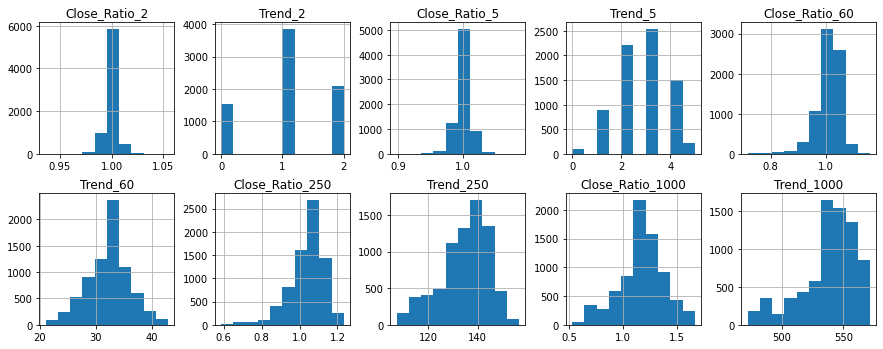

In [61]:
# Plot the distribution of new_features
selected_columns = ['Close_Ratio_2','Trend_2','Close_Ratio_5','Trend_5','Close_Ratio_60','Trend_60','Close_Ratio_250','Trend_250','Close_Ratio_1000','Trend_1000']
selected_data = df_new[selected_columns]
# Plot histograms using hist method
histogram = selected_data.hist(layout=(5, 5), figsize=(15, 15))
plt.savefig('histogram1.png')# saving image so we can use in ppt

In [62]:
#Null error rate
NRE = df_new.Target.value_counts()[1]/(df_new.Target.value_counts()[0] + df_new.Target.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

0.46269256530475555

### Improving the Model Performance

In [63]:
# update the model slightly and change some of the parameters
model=RandomForestClassifier(n_estimators=200,min_samples_split=10,random_state=1)

In [69]:
# rewrite the predict function slightly
# transform the predicted probabilities (preds) into binary predictions
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors]) [:,1]
    preds[preds >=.6] = 1 # this will reduce the number of trading days
    # but increase the chance the price actually go up on those days
    preds[preds < .6]= 0
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [70]:
# run the backtest again
predictions=backtest(df_new,model,new_predictors)

Here, I removed the old predictors because those are just absolute numbers. So, it is not super informative to the model if the price today is for example 465 dollar , it doesn't tell me anything whether the price goes up or down tomorrow. The ratios are the most informative part and it showed us  what is the price today compared to the price yesterday and the price last week. That is why I took those columns out.

In [71]:
# check the value count again
predictions["predictions"].value_counts()

predictions
0.0    4030
1.0     935
Name: count, dtype: int64

There were approximately four thousand instances where the prediction indicated a decline in price. The distribution has notably shifted, revealing that only a handful of days were projected for price increase. This shift can be attributed to a change in the threshold: I instructed the model to exhibit greater confidence in its prediction before forecasting an upward price movement. Consequently, our trading or stock purchasing activities have been curtailed, occurring on fewer occasions.

In [72]:
precision_score(predictions["Target"],predictions["predictions"])


0.5689839572192513

## Summary and Next Steps with the Model

Ultimately, I arrived at the conclusion that the ensemble model yields result comparable to those of the other models. Drawing on the outcomes outlined above, the model enriched with new features demonstrates a 57% precision in predicting upward shifts in stock prices during purchase instances. This achievement stands commendable, especially given the context of relying solely on time-series data and historical index prices. Notably, due to computational limitations, neural networks, particularly recurrent ones like Long-Short Term Memory (LSTM) networks tailored for time-series data, were omitted from consideration in this project.

Considering the research question at hand, there remains substantial room for advancement. Expanding the dataset could yield improved predictions by leveraging factors such as Twitter sentiment or economic indicators to enhance the assessment of whether stocks will trend upward or downward. Although this project is not exhaustive, it serves as a foundational analysis for future endeavors. The array of machine learning models crafted throughout this journey, some of which were novel to me, significantly contributes to potential future work. Overall, this project has been enlightening, providing insights into various model workings, even though the predictive accuracy regarding stock trends proved less satisfactory.

Additionally, time limitations prevented the exploration of alternative methods of feature engineering, such as incorporating classic stock market indicators. To enhance the model, I recommended to integrate exchanges operating overnight. While the S&P 500 trades only during US market hours, other global indices commence trading before the US market opens. Exploring correlations between these indices and the S&P 500 could potentially yield valuable insights.

Finally, this marks the culmination of the first phase of the project. The forthcoming second stage will be  exploring the avenues for improvement. It is crucial to acknowledge, however, that predicting financial markets, including stock prices like the S&P 500, is a formidable and intricate undertaking. Financial markets are influenced by an extensive array of variables. Thus, consistently achieving high accuracy in stock price predictions remains a challenging task.


## Powerpoint Presentation 

In [401]:
# Create powerpoint presentation with python
path = "sample.pptx"
#Intitalizing PPt object 
prs = Presentation() 

# creating slide 1 
zero_slide = prs.slide_layouts[6]
slide0 = prs.slides.add_slide(zero_slide)
 
txBox = slide0.shapes.add_textbox( pptx.util.Inches(3.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(1))
tf = txBox.text_frame
tf.clear()
p = tf.paragraphs[0]
run = p.add_run()
run.text = 'SP500 Data Analysis'
font = run.font
font.name = 'Calibri'
font.size = Pt(24)
font.bold = True
font.italic = None 
p.alignment = PP_ALIGN.CENTER


# creating slide 2 
blank_slide_layout = prs.slide_layouts[6] 
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
pic = slide.shapes.add_picture('histogram.png', pptx.util.Inches(0.25), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 3
second_slide = prs.slide_layouts[6]
slide2 = prs.slides.add_slide(second_slide)
 
pic = slide2.shapes.add_picture('x6.png', pptx.util.Inches(1.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(7), height=pptx.util.Inches(2))

pic = slide2.shapes.add_picture('y2.png', pptx.util.Inches(0.5), pptx.util.Inches(3.5),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(3))

# creating slide 3
third_slide = prs.slide_layouts[6]
slide3 = prs.slides.add_slide(third_slide)

pic = slide3.shapes.add_picture('i1.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(6))

# creating slide 4
forth_slide = prs.slide_layouts[6]
slide4 = prs.slides.add_slide(forth_slide)

pic = slide4.shapes.add_picture('i9.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 5
fifth_slide = prs.slide_layouts[6]
slide5 = prs.slides.add_slide(fifth_slide)

pic = slide5.shapes.add_picture('e8.png', pptx.util.Inches(1), pptx.util.Inches(0.5),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(2))
# creating slide 6
sixth_slide = prs.slide_layouts[6]
slide6 = prs.slides.add_slide(sixth_slide)
pic = slide6.shapes.add_picture('z10.png', pptx.util.Inches(0.5), pptx.util.Inches(3),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(4))

# creating slide 7
seventh_slide = prs.slide_layouts[6]
slide6 = prs.slides.add_slide(seventh_slide)
pic = slide6.shapes.add_picture('w20.png', pptx.util.Inches(0.5), pptx.util.Inches(3),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(4))
# creating slide 8
eighth_slide = prs.slide_layouts[6]
slide6 = prs.slides.add_slide(eighth_slide)
pic = slide6.shapes.add_picture('histogram1.png', pptx.util.Inches(0.5), pptx.util.Inches(3),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(4))


#saving the created slide 
prs.save('S&P500 stock price.pptx')

## Reference 
1. https://www.researchgate.net/figure/High-Frequency-Trading-Domain-source-Aldridge-2013_fig1_358123608
2. https://www.kaggle.com/code/samaxtech/predicting-s-p500-index-linearreg-randomforests  
3. 4.https://medium.com/@akashsangar2653/eda-and-price-prediction-of-s-p-500-stock-prices-dataset-290535b9a40b
5. https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
6. https://www.kaggle.com/code/yash16jr/s-p500-data-eda-and-prediction-arima-sarimax
7. https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
8. https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests   
9. https://ai.plainenglish.io/using-deep-learning-to-predict-stock-prices-a-step-by-step-guide-with-python-and-the-s-p-500-59b06de25357
10. https://medium.com/codex/stocks-news-sentiment-analysis-with-deep-learning-transformers-and-machine-learning-cdcdb827fc06 
11. https://medium.com/mlearning-ai/predict-sp500-stock-price-with-python-machine-learning-sentiment-analysis-a296dc276353
12. https://ai.plainenglish.io/using-deep-learning-to-predict-stock-prices-a-step-by-step-guide-with-python-and-the-s-p-500-59b06de25357
13. http://cs229.stanford.edu/proj2020spr/report/Fuster_Zou.pdf
14. https://www.sciencedirect.com/science/article/pii/S2666827022000378

# Thank You !